In [341]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu



In [342]:
#importing datasets
d1 =pd.read_csv("./dataset1.csv")
d1
d2 = pd.read_csv("./dataset2.csv")
d2

#d1 is dataset1 and d2 is dataset2

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0
...,...,...,...,...,...,...,...
2118,1/06/2018 3:41,6,8.0,20,1.000000,0.0,0
2119,1/06/2018 4:11,6,8.5,7,1.000000,0.0,0
2120,1/06/2018 4:41,6,9.0,6,1.000000,0.0,0
2121,1/06/2018 5:11,6,9.5,7,1.000000,0.0,0


In [343]:
#reading the dataset1, analyzing dtypes
print (d1.shape)
print (d1.head(5))
print (d1.tail())
print(d1.describe(include ="float64"))
print(d1.describe(include ="int64"))
print(d1.describe(include="object"))

# bat_landing- how many bats landed in the food
# food availability- available food
# rat_period- total minutes rats were present on the platform before the bat landing 
# 


(907, 12)
         start_time  bat_landing_to_food habit  rat_period_start  \
0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   

     rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
0  30/12/2017 18:38                        108     1       0      0   
1  30/12/2017 19:55                         17     0       1      0   
2  30/12/2017 19:55                         41     0       1      0   
3  30/12/2017 19:55                        111     1       0      0   
4  30/12/2017 19:55                        194     1       0      0   

        sunset_time  hours_after_sunset  season  
0  30/12/2017 16:45            1.870833       0  
1  30/12/2017 16:45            3.100833       0  
2  3

In [344]:
#reading the dataset2
print (d2.shape)
print (d2.head(5))
print (d2.tail())
print(d2.describe(include ="float64"))
print(d2.describe(include ="int64"))
print(d2.describe(include="object"))

(2123, 7)
               time  month  hours_after_sunset  bat_landing_number  \
0  26/12/2017 16:13      0                -0.5                  20   
1  26/12/2017 16:43      0                 0.0                  28   
2  26/12/2017 17:13      0                 0.5                  25   
3  26/12/2017 17:43      0                 1.0                  71   
4  26/12/2017 18:13      0                 1.5                  44   

   food_availability  rat_minutes  rat_arrival_number  
0           4.000000          0.0                   0  
1           4.000000          0.0                   0  
2           4.000000          0.0                   0  
3           4.000000          0.0                   0  
4           3.753857          0.0                   0  
                time  month  hours_after_sunset  bat_landing_number  \
2118  1/06/2018 3:41      6                 8.0                  20   
2119  1/06/2018 4:11      6                 8.5                   7   
2120  1/06/2018 4:41

In [345]:
#finding missing values
d1.isnull().sum()

start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

In [346]:
#let's fill missing values instead of dropping
d1= d1.fillna({'habit':'NA'})
#rechecking the missing values
d1.isnull().sum()




start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
dtype: int64

In [347]:
#missing values of d2
d2.isnull().sum()

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

In [348]:
#checking for duplicates:
dup1= print(d1.duplicated().sum())
dup2= print(d2.duplicated().sum())

1
0


In [349]:
# dropping the 1duplicate in dataset1
d1 = d1.drop_duplicates(keep='last')

#checking the update
dup1= print(d1.duplicated().sum())

0


- not many null values to remove as it disrupt the findings
- filling the d1 with NA to avoid loosing information
- hypothesis/thinking : If the bats view rats as a predetor, they wouldn't land on the food when rats's present despite the food being available
- If bats only see as a rival, their presence on food could overlap.
- perform descriptive and inferantial DA
- Imp columns of d1- habits (fast,rat,pick), risk, reward, bat_landing, rat_arrival, hours_after_sunset
- c2- bat_landing, Rat_arrival, rat_minutes, food_availability, hrs_after_sunset





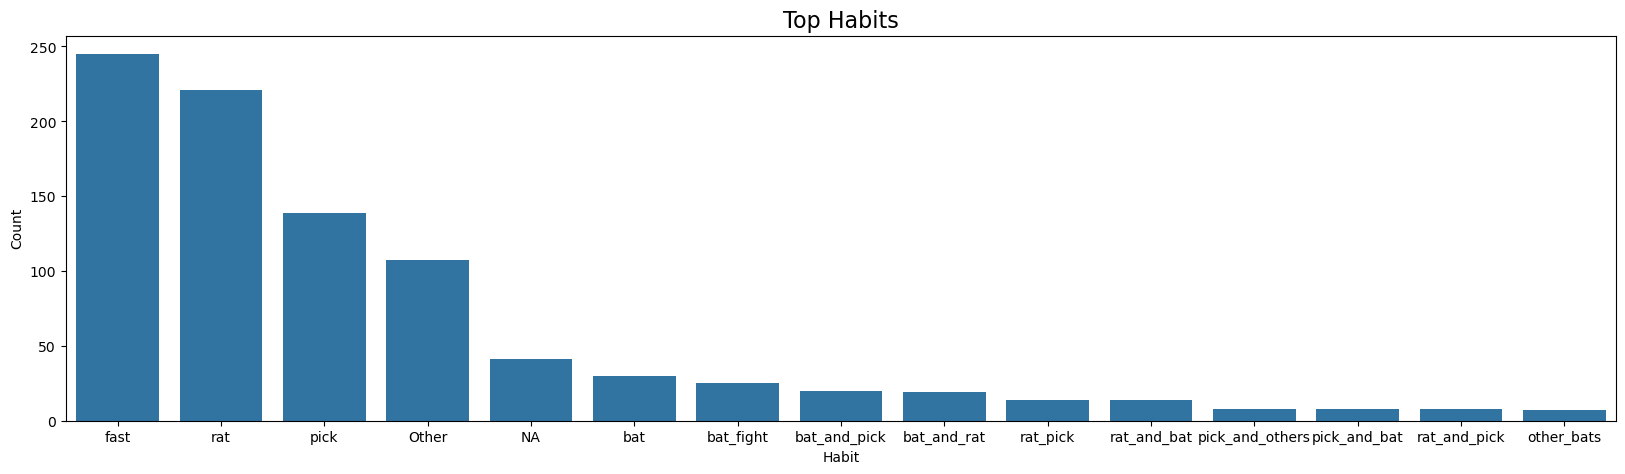

In [350]:
#let's visualize it / Descriptive Analysis

#counting top 15 habits and categorizing remaining as others
top_habits = d1['habit'].value_counts().nlargest(14)
habit_counts = d1['habit'].apply(lambda x: x if x in top_habits.index else "Other").value_counts()

plt.figure(figsize=(20,5))
sns.barplot(x=habit_counts.index, y=habit_counts.values)
plt.title("Top Habits", fontsize=16)
plt.ylabel("Count")
plt.xlabel("Habit")
plt.show()

In [351]:
#risk VS reward
risk_reward = d1[['risk','reward']].mean() * 100
print("% of Landings with Risk vs Reward:\n",risk_reward)

% of Landings with Risk vs Reward:
 risk      49.448124
reward    53.421634
dtype: float64


In [ ]:
# #convert timeto datetime:
# d1['start_time'] = pd.to_datetime(d1['start_time'], dayfirst=True)
# d1['rat_period_start'] = pd.to_datetime(d1['rat_period_start'], dayfirst=True)
# d1['rat_period_end'] = pd.to_datetime(d1['rat_period_end'], dayfirst=True)


                  risk    reward
rat_presence                    
no rat        0.230252  0.746218
rat           1.000000  0.128617


/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_96139/154901094.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d1, x='rat_presence', y='risk', palette='Reds')


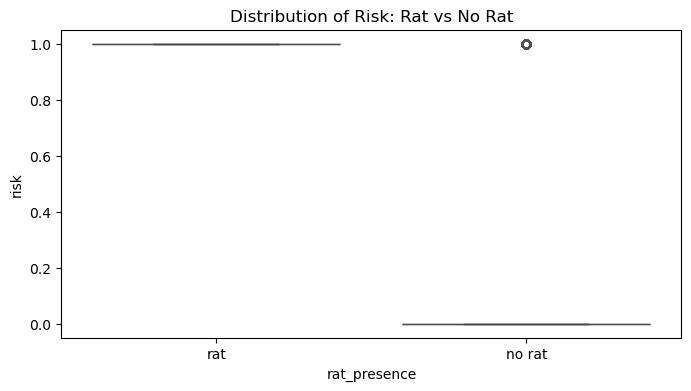

/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_96139/154901094.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d1, x='rat_presence', y='reward', palette='Greens')


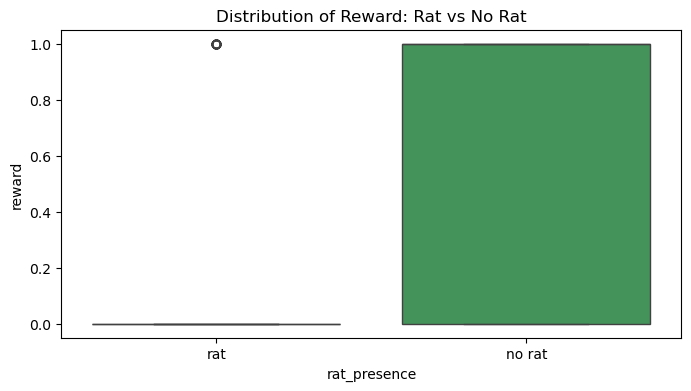

In [390]:
#Risk and reward when habit includes "rat" vs "no rat"

d1['rat_presence'] = d1['habit'].apply(lambda x: 'rat' if 'rat' in str(x).lower() else 'no rat')
print(d1.groupby('rat_presence')[['risk','reward']].mean())

plt.figure(figsize=(8,4))
sns.boxplot(data=d1, x='rat_presence', y='risk', palette='Reds')
plt.title("Distribution of Risk: Rat vs No Rat")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=d1, x='rat_presence', y='reward', palette='Greens')
plt.title("Distribution of Reward: Rat vs No Rat")
plt.show()

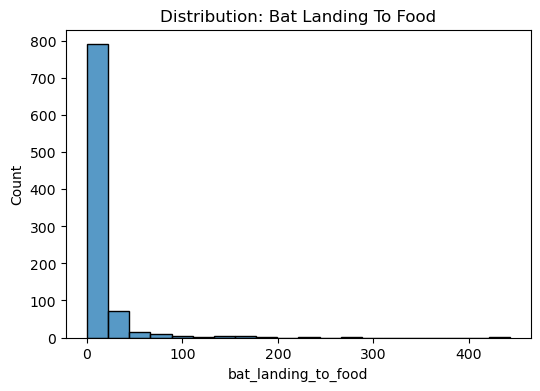

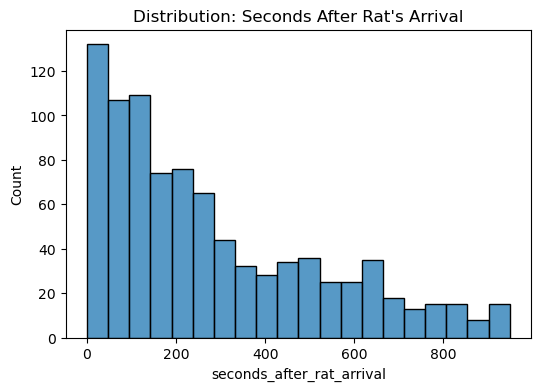

In [391]:
#comparing bat_landing_to _food and seconds_after_rat_arrival
plt.figure(figsize=(6,4))
sns.histplot(d1['bat_landing_to_food'], bins=20)
plt.title("Distribution: Bat Landing To Food")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(d1['seconds_after_rat_arrival'], bins=20)
plt.title("Distribution: Seconds After Rat's Arrival")
plt.show()

In [392]:
#since Dataset2 has time-block, this is more numerical
#Hence Analysisng it Descriptively using stats
print("Summary:")
print(d2[['bat_landing_number','rat_arrival_number','food_availability']].agg(['mean','median']))


Summary:
        bat_landing_number  rat_arrival_number  food_availability
mean             32.083373            0.444654           2.445874
median           27.000000            0.000000           2.951877


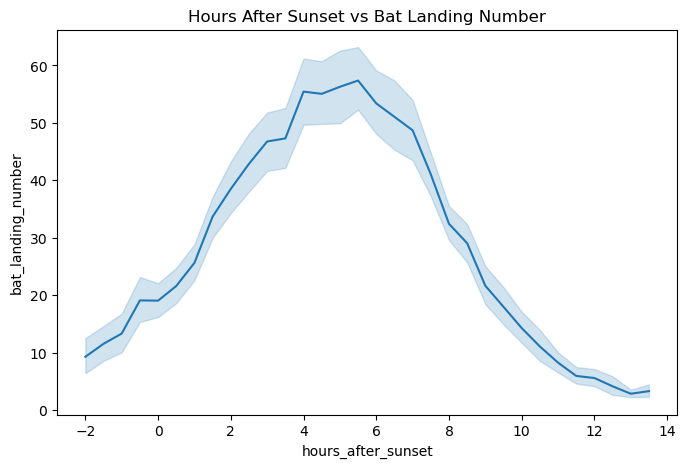

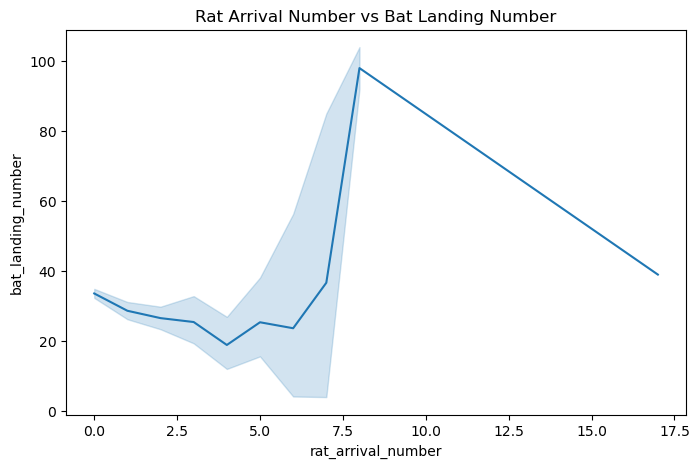

In [393]:
#Line plots
plt.figure(figsize=(8,5))
sns.lineplot(data=d2, x='hours_after_sunset', y='bat_landing_number')
plt.title("Hours After Sunset vs Bat Landing Number")
plt.show()

plt.figure(figsize=(8,5))
sns.lineplot(data=d2, x='rat_arrival_number', y='bat_landing_number')
plt.title("Rat Arrival Number vs Bat Landing Number")
plt.show()

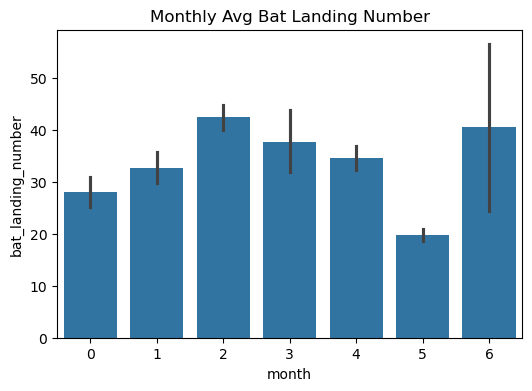

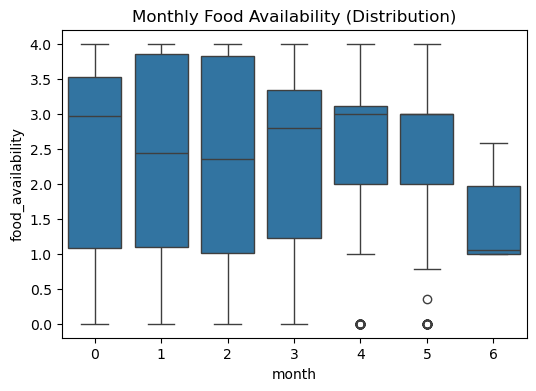

In [394]:
plt.figure(figsize=(6,4))
sns.barplot(data=d2, x='month', y='bat_landing_number', estimator='mean')
plt.title("Monthly Avg Bat Landing Number")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(data=d2, x='month', y='food_availability')
plt.title("Monthly Food Availability (Distribution)")
plt.show()

In [395]:
#based on the graphs above we don't have much outliers, Yet checking

def detect_outliers(data, columns):
    outlier_summary = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)

        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_summary[col] = {
            "num_outliers": outliers.shape[0],
            "outlier_values": outliers[col].unique()[:10]  # <-- fixed here
        }

        print(f'{col} outlier detection:')
        print(f'  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
        print(f'  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
        print(f'  Number of outliers detected: {outliers.shape[0]}')
        print(f'  Example outlier values: {outliers[col].unique()[:10]}\n')

    return outlier_summary



print("---- Dataset 1 ----")
d1_outlier_summary = detect_outliers(d1, d1_columns)

print("---- Dataset 2 ----")
d2_outlier_summary = detect_outliers(d2, d2_columns)




---- Dataset 1 ----
bat_landing_to_food outlier detection:
  Q1: 1.0, Q3: 11.75, IQR: 10.75
  Lower Bound: -15.125, Upper Bound: 27.875
  Number of outliers detected: 88
  Example outlier values: [ 31. 155.  29.  34.  48.  59.  68.  55.  65. 275.]

seconds_after_rat_arrival outlier detection:
  Q1: 89.25, Q3: 447.25, IQR: 358.0
  Lower Bound: -447.75, Upper Bound: 984.25
  Number of outliers detected: 0
  Example outlier values: []

---- Dataset 2 ----
bat_landing_number outlier detection:
  Q1: 11.0, Q3: 48.0, IQR: 37.0
  Lower Bound: -44.5, Upper Bound: 103.5
  Number of outliers detected: 24
  Example outlier values: [130 113 105 104 107 106 133 117 129 111]

rat_arrival_number outlier detection:
  Q1: 0.0, Q3: 1.0, IQR: 1.0
  Lower Bound: -1.5, Upper Bound: 2.5
  Number of outliers detected: 92
  Example outlier values: [17  3  8  5  4  7  6]

rat_minutes outlier detection:
  Q1: 0.0, Q3: 0.1583333335, IQR: 0.1583333335
  Lower Bound: -0.23750000025, Upper Bound: 0.39583333375
  Nu

In [396]:
# decided to drop the outliers and perform interential analysis.
def drop_outliers(data, columns):
    clean_data = data.copy()
    for col in columns:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]
    return clean_data


In [397]:
# removinf outliers from the specified columns of the datasets and comapring original vs cleaned
d1_columns = ['bat_landing_to_food', 'seconds_after_rat_arrival']
d2_columns = ['bat_landing_number', 'rat_arrival_number', 'rat_minutes', 'food_availability']

d1_clean = drop_outliers(d1, d1_columns)
d2_clean = drop_outliers(d2, d2_columns)

print("Original D1 shape:", d1.shape)
print("Cleaned D1 shape:", d1_clean.shape)

print("Original D2 shape:", d2.shape)
print("Cleaned D2 shape:", d2_clean.shape)


Original D1 shape: (906, 13)
Cleaned D1 shape: (818, 13)
Original D2 shape: (2123, 7)
Cleaned D2 shape: (1555, 7)


In [398]:
#saving new datasets
d1_clean.to_csv("d1_clean.csv", index=False)
d2_clean.to_csv("d2_clean.csv", index=False)





In [399]:
#testing errors:
print(d1_clean.columns)
print (d1_clean.isnull().sum())

Index(['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start',
       'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward',
       'month', 'sunset_time', 'hours_after_sunset', 'season', 'rat_presence'],
      dtype='object')
start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
rat_presence                 0
dtype: int64


In [400]:
#converting time for cleaned dataset
d1_clean['start_time'] = pd.to_datetime(d1_clean['start_time'], dayfirst=True)
d1_clean['rat_period_start'] = pd.to_datetime(d1_clean['rat_period_start'], dayfirst=True)
d1_clean['rat_period_end'] = pd.to_datetime(d1_clean['rat_period_end'], dayfirst=True)

d2_clean['time'] = pd.to_datetime(d2_clean['time'], dayfirst=True)


T-test (risk ~ rat vs no rat): nan nan


/opt/anaconda3/envs/hit140env/lib/python3.12/site-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)
/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_96139/3866881055.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d1_clean, x='rat_presence', y='risk', palette='Reds')


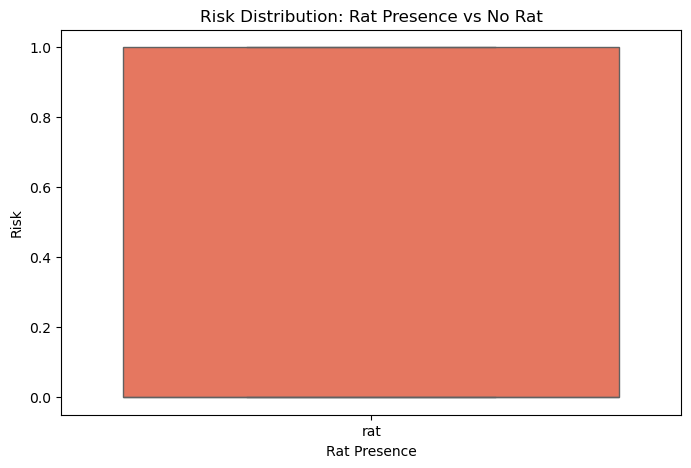

In [411]:
#inferential Analysis
#T-test: checking risk betwn Rat vs No rat
#recreating teh rat_presence column for clean dataset like above
d1_clean['rat_presence'] = d1_clean.apply(
    lambda row: 'rat' if row['rat_period_start'] <= row['start_time'] <= row['rat_period_end'] else 'no rat',
    axis=1
)

rat_group = d1_clean[d1_clean['rat_presence']=='rat']['risk']
no_rat_group = d1_clean[d1_clean['rat_presence']=='no rat']['risk']

t_stat, p_val = stats.ttest_ind(rat_group, no_rat_group, equal_var=False)
print("T-test (risk ~ rat vs no rat):", t_stat, p_val)

plt.figure(figsize=(8, 5))
sns.boxplot(data=d1_clean, x='rat_presence', y='risk', palette='Reds')
plt.title("Risk Distribution: Rat Presence vs No Rat")
plt.xlabel("Rat Presence")
plt.ylabel("Risk")
plt.show()





/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_96139/3564846164.py:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p_val = stats.pearsonr(d2_30min['bat_landing_number'], d2_30min['rat_arrival_number'])


Correlation coefficient (30-min bins): nan
P-value: nan


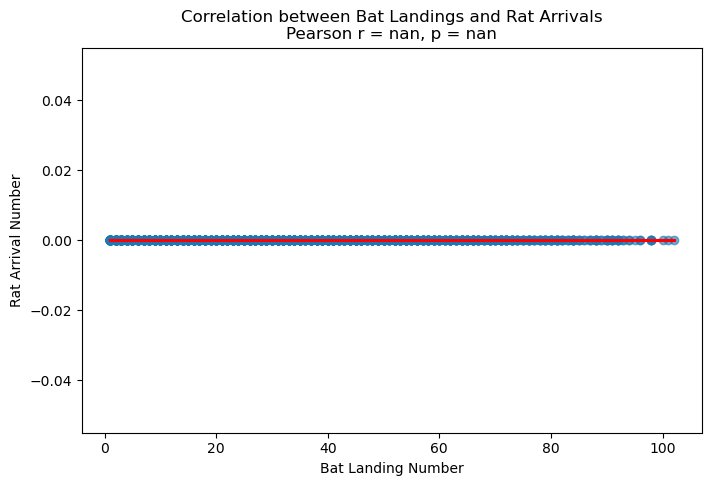

In [ ]:
# Correlation: bat_landings vs rat_arrivals
corr, p_val = stats.pearsonr(d2_30min['bat_landing_number'], d2_30min['rat_arrival_number'])

print(f"Correlation coefficient (30-min bins): {corr:.3f}")
print(f"P-value: {p_val:.3f}")

plt.figure(figsize=(8, 5))
sns.regplot(x='bat_landing_number', y='rat_arrival_number', data=d2_clean, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title(f"Correlation between Bat Landings and Rat Arrivals\nPearson r = {corr:.2f}, p = {p_corr:.3f}")
plt.xlabel("Bat Landing Number")
plt.ylabel("Rat Arrival Number")
plt.show()

In [ ]:
#checking corelation:
print(f"Correlation coefficient: {corr:.3f}")
print(f"P-value: {p_corr:.3f}")

#checking columns:
print(d2_clean['bat_landing_number'].nunique())
print(d2_clean['rat_arrival_number'].nunique())

#checking for missing values since rat_arrival is all same value:
print(d2_clean[['bat_landing_number', 'rat_arrival_number']].isnull().sum())


Correlation coefficient: nan
P-value: nan
100
1
bat_landing_number    0
rat_arrival_number    0
dtype: int64


In [ ]:
print(d2_clean['rat_arrival_number'].value_counts())



rat_arrival_number
0    1555
Name: count, dtype: int64


/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_96139/1565751454.py:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr_spearman, p_spearman = spearmanr(d2_30min['bat_landing_number'], d2_30min['rat_arrival_number'])


Spearman correlation: nan, p-value: nan


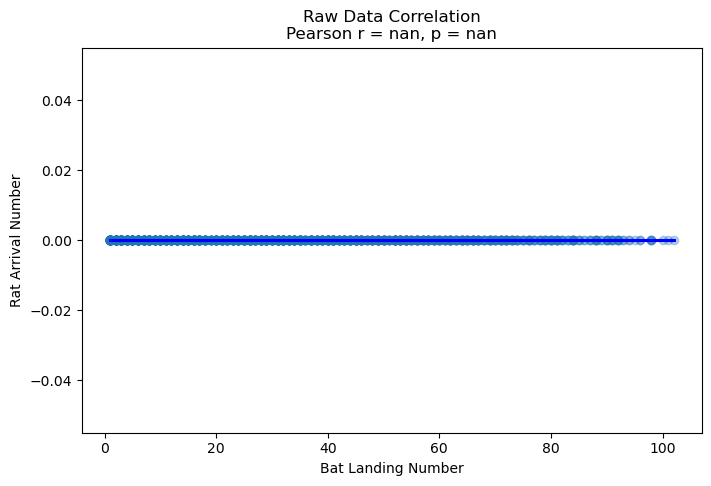

In [ ]:
# Correlation: bat_landings vs rat_arrivals on original data

corr_spearman, p_spearman = spearmanr(d2_30min['bat_landing_number'], d2_30min['rat_arrival_number'])
print(f"Spearman correlation: {corr_spearman:.3f}, p-value: {p_spearman:.3f}")

plt.figure(figsize=(8, 5))
sns.regplot(x='bat_landing_number', y='rat_arrival_number', data=d2_clean, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})
plt.title(f"Raw Data Correlation\nPearson r = {corr_raw:.2f}, p = {p_val_raw:.3f}")
plt.xlabel("Bat Landing Number")
plt.ylabel("Rat Arrival Number")
plt.show()


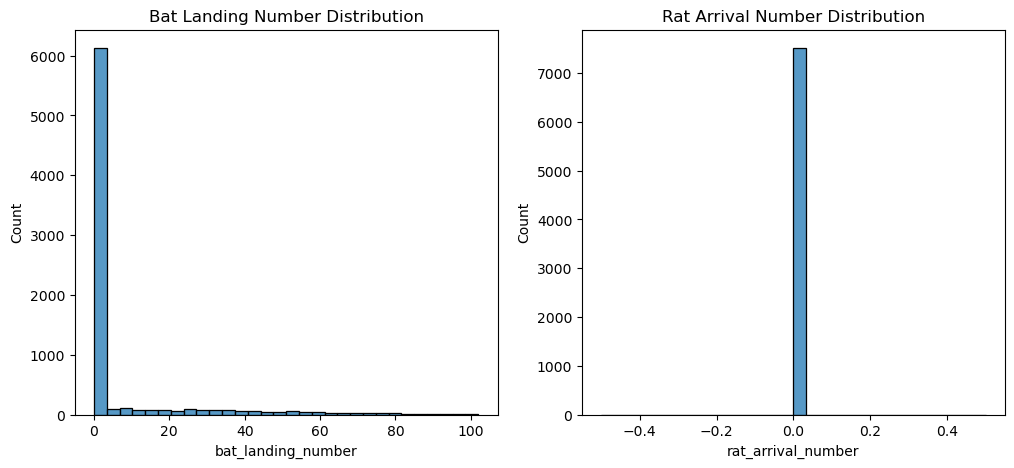

In [ ]:
#since we're getting the straight horizontal line showing no correlation, trying histplot for visualizatio
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.histplot(d2_30min['bat_landing_number'], bins=30)
plt.title('Bat Landing Number Distribution')

plt.subplot(1, 2, 2)
sns.histplot(d2_30min['rat_arrival_number'], bins=30)
plt.title('Rat Arrival Number Distribution')

plt.show()

Mann-Whitney U Test statistic: nan
P-value: nan


/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_96139/3718761858.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(rat_group, no_rat_group, alternative='two-sided')
/var/folders/wh/xw98sbx17fz88zct2t143p9c0000gn/T/ipykernel_96139/3718761858.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=d1_clean, x='rat_presence', y='risk', palette='Set2')


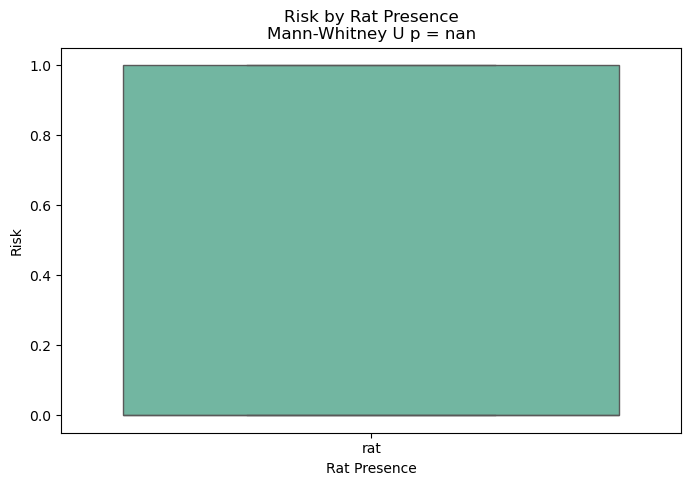

In [ ]:
# Mann-Whitney U test
rat_group = d1_clean[d1_clean['rat_presence'] == 'rat']['risk']
no_rat_group = d1_clean[d1_clean['rat_presence'] == 'no rat']['risk']

stat, p = mannwhitneyu(rat_group, no_rat_group, alternative='two-sided')
print(f"Mann-Whitney U Test statistic: {stat:.3f}")
print(f"P-value: {p:.3f}")

# Boxplot visualization
plt.figure(figsize=(8, 5))
sns.boxplot(data=d1_clean, x='rat_presence', y='risk', palette='Set2')
plt.title(f'Risk by Rat Presence\nMann-Whitney U p = {p:.3f}')
plt.xlabel('Rat Presence')
plt.ylabel('Risk')
plt.show()


Seems Like we don't have correlation to show. 

Spearman correlation: rho = 0.084, p = 0.016


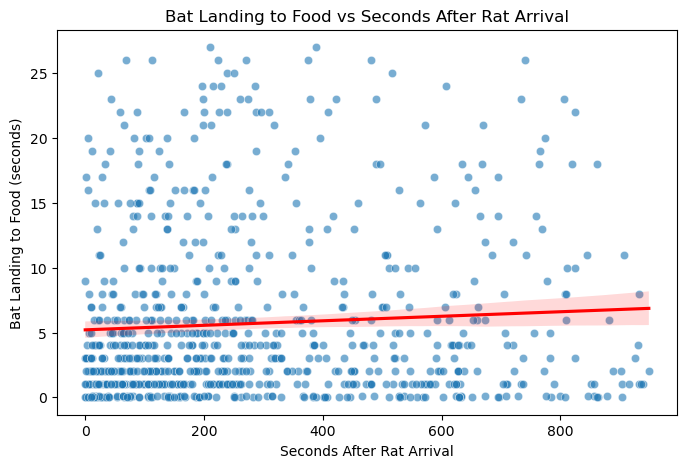

In [ ]:
# Drop missing values for the columns
d1_corr = d1_clean.dropna(subset=['bat_landing_to_food', 'seconds_after_rat_arrival'])

# Spearman correlation
corr, p_val = stats.spearmanr(d1_corr['bat_landing_to_food'], d1_corr['seconds_after_rat_arrival'])
print(f"Spearman correlation: rho = {corr:.3f}, p = {p_val:.3f}")

# Scatter plot with regression line
plt.figure(figsize=(8,5))
sns.scatterplot(x='seconds_after_rat_arrival', y='bat_landing_to_food', data=d1_corr, alpha=0.6)
sns.regplot(x='seconds_after_rat_arrival', y='bat_landing_to_food', data=d1_corr, scatter=False, color='red')
plt.title('Bat Landing to Food vs Seconds After Rat Arrival')
plt.xlabel('Seconds After Rat Arrival')
plt.ylabel('Bat Landing to Food (seconds)')
plt.show()
